P-3.55 Perform an experimental analysis of the three algorithms prefix average1,
prefix average2, and prefix average3, from Section 3.3.3. Visualize their
running times as a function of the input size with a log-log chart.

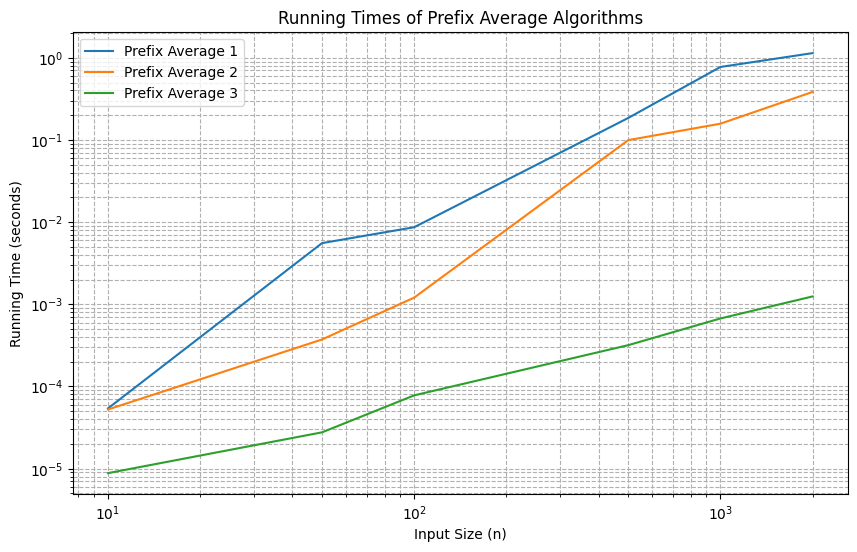

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

def prefix_average1(S):
    n = len(S)
    A = [0] * n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        A[j] = total / (j + 1)
    return A

def prefix_average2(S):
    n = len(S)
    A = [0] * n
    for j in range(n):
        A[j] = sum(S[0:j + 1]) / (j + 1)
    return A

def prefix_average3(S):
    n = len(S)
    A = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        A[j] = total / (j + 1)
    return A

def measure_time(algorithm, S):
    start_time = time.time()
    algorithm(S)
    return time.time() - start_time

input_sizes = [10, 50, 100, 500, 1000, 2000]

labels = ['Prefix Average 1', 'Prefix Average 2', 'Prefix Average 3']

times = {label: [] for label in labels}

for n in input_sizes:
    S = np.random.random(n)
    for i, algorithm in enumerate([prefix_average1, prefix_average2, prefix_average3]):
        label = labels[i]
        elapsed_time = measure_time(algorithm, S)
        times[label].append(elapsed_time)

plt.figure(figsize=(10, 6))
for label in labels:
    plt.plot(input_sizes, times[label], label=label)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (seconds)')
plt.title('Running Times of Prefix Average Algorithms')

plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()


P-3.57 Perform experimental analysis to test the hypothesis that Python’s sorted method runs in O(n log n) time on average.

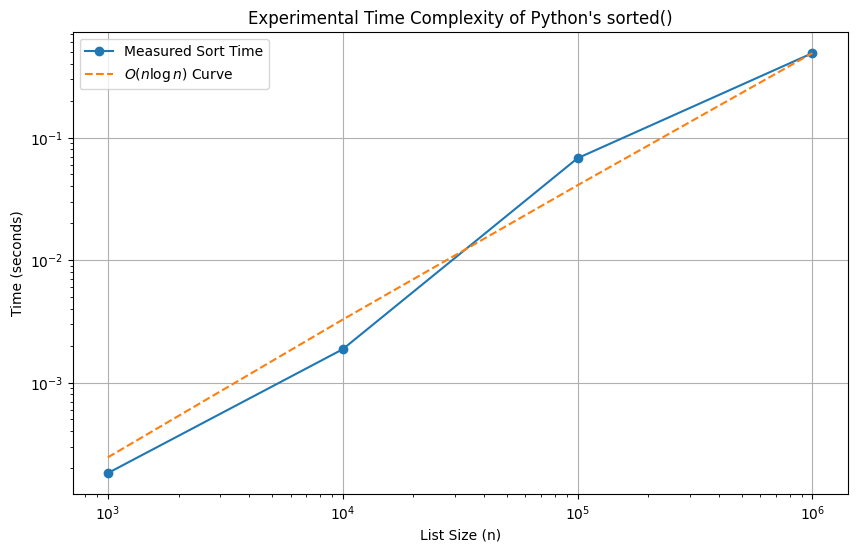

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def measure_sort_time(n):
    lst = random.sample(range(n * 10), n)
    start_time = time.time()
    sorted_lst = sorted(lst)
    end_time = time.time()
    return end_time - start_time

list_sizes = [10**3, 10**4, 10**5, 10**6]

sort_times = []
for size in list_sizes:
    sort_times.append(measure_sort_time(size))

n_log_n = [n * np.log(n) for n in list_sizes]

plt.figure(figsize=(10, 6))
plt.plot(list_sizes, sort_times, label="Measured Sort Time", marker="o")
plt.plot(list_sizes, [t / n_log_n[-1] * sort_times[-1] for t in n_log_n],
         label=r"$O(n \log n)$ Curve", linestyle="--")

plt.xscale('log')
plt.yscale('log')
plt.xlabel("List Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Experimental Time Complexity of Python's sorted()")
plt.legend()
plt.grid(True)
plt.show()